In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [159]:
train_data=pd.read_csv("D:\\AI-SL\\ML Project\\Mercedes Benz\\train.csv")
test_data=pd.read_csv("D:\\AI-SL\\ML Project\\Mercedes Benz\\test.csv")

In [8]:
train_data.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [9]:
train_data.tail()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
4204,8405,107.39,ak,s,as,c,d,aa,d,q,...,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,j,o,t,d,d,aa,h,h,...,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,ak,v,r,a,d,aa,g,e,...,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,al,r,e,f,d,aa,l,u,...,0,0,0,0,0,0,0,0,0,0
4208,8417,110.85,z,r,ae,c,d,aa,g,w,...,1,0,0,0,0,0,0,0,0,0


In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [11]:
train_data.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 377 entries, ID to X385
dtypes: int64(369), object(8)
memory usage: 12.1+ MB


In [13]:
test_data.describe()

,ID,X10,X11,X12,X13,X14,X15,X16,X17,X18,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4211.039202,0.019007,0.000238,0.074364,0.061060,0.427893,0.000713,0.002613,0.008791,0.010216,...,0.325968,0.049656,0.311951,0.019244,0.011879,0.008078,0.008791,0.000475,0.000713,0.001663
std,2423.078926,0.136565,0.015414,0.262394,0.239468,0.494832,0.026691,0.051061,0.093357,0.100570,...,0.468791,0.217258,0.463345,0.137399,0.108356,0.089524,0.093357,0.021796,0.026691,0.040752
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2115.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4202.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6310.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8416.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Check for Zero Variance columns

In [14]:
numeric_columns=train_data.select_dtypes(include=np.number) #take columns that has only numbers
variance_per_column=np.var(numeric_columns,axis=0)
print(variance_per_column)

ID      5.940524e+06
y       1.607285e+02
X10     1.312780e-02
X11     0.000000e+00
X12     6.944063e-02
            ...     
X380    8.012675e-03
X382    7.544954e-03
X383    1.660337e-03
X384    4.749465e-04
X385    1.423485e-03
Length: 370, dtype: float64


In [15]:
zero_var_col=numeric_columns.columns[variance_per_column==0]
zero_var_col

Index(['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293',
       'X297', 'X330', 'X347'],
      dtype='object')

In [16]:
train_data[zero_var_col]


,X11,X93,X107,X233,X235,X268,X289,X290,X293,X297,X330,X347
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4204,0,0,0,0,0,0,0,0,0,0,0,0
4205,0,0,0,0,0,0,0,0,0,0,0,0
4206,0,0,0,0,0,0,0,0,0,0,0,0
4207,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
train_data=train_data.drop(columns=zero_var_col)
#print(train_data.columns)
      

In [18]:
test_data_num_col=test_data.select_dtypes(include=np.number)
test_var_percol=np.var(test_data_num_col)
test_var_percol

ID      5.869917e+06
X10     1.864563e-02
X11     2.375297e-04
X12     6.883438e-02
X13     5.733136e-02
            ...     
X380    8.012675e-03
X382    8.713410e-03
X383    4.749465e-04
X384    7.122504e-04
X385    1.660337e-03
Length: 369, dtype: float64

In [19]:
test_data_zero_var_col=test_data_num_col.columns[test_var_percol==0]
test_data_zero_var_col



Index(['X257', 'X258', 'X295', 'X296', 'X369'], dtype='object')

In [20]:
test_data[test_data_zero_var_col]

,X257,X258,X295,X296,X369
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
4204,0,0,0,0,0
4205,0,0,0,0,0
4206,0,0,0,0,0
4207,0,0,0,0,0


In [21]:
test_data=test_data.drop(columns=[test_data_zero_var_col])

KeyError: "[('X257', 'X258', 'X295', 'X296', 'X369')] not found in axis"

In [151]:
test_data.columns

Index(['ID', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'X10',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=377)

In [158]:
train_data.shape

(4209, 366)

# Check for Null and unique values

In [22]:
train_data.isna().sum()

ID      0
y       0
X0      0
X1      0
X2      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 366, dtype: int64

In [23]:
test_data.isna().sum()

ID      0
X0      0
X1      0
X2      0
X3      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 377, dtype: int64

In [24]:
features_with_na= [features for features in train_data.columns if train_data[features].isna().sum()>0]
print(features_with_na)

[]


In [25]:
test_features_with_na=[features for features in test_data.columns if test_data[features].isna().sum()>0]
print(test_features_with_na)

[]


In [26]:
train_data.columns


Index(['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=366)

In [27]:
train_data.nunique()

ID      4209
y       2545
X0        47
X1        27
X2        44
        ... 
X380       2
X382       2
X383       2
X384       2
X385       2
Length: 366, dtype: int64

In [28]:
test_data.nunique()

ID      4209
X0        49
X1        27
X2        45
X3         7
        ... 
X380       2
X382       2
X383       2
X384       2
X385       2
Length: 377, dtype: int64

# Label encoding for category columns


In [152]:
train_cat_cols=train_data.select_dtypes(include=object) #to extract columns with string
train_cat_cols

,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,k,t,av,e,d,y,l,o
2,az,w,n,c,d,x,j,x
3,az,t,n,f,d,x,l,e
4,az,v,n,f,d,h,d,n
...,...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d,q
4205,j,o,t,d,d,aa,h,h
4206,ak,v,r,a,d,aa,g,e
4207,al,r,e,f,d,aa,l,u


In [153]:
for col in train_cat_cols.columns:
    print("col:{} and unique values :{}".format(col,train_cat_cols[col].unique()))

col:X0 and unique values :['k' 'az' 't' 'al' 'o' 'w' 'j' 'h' 's' 'n' 'ay' 'f' 'x' 'y' 'aj' 'ak' 'am'
 'z' 'q' 'at' 'ap' 'v' 'af' 'a' 'e' 'ai' 'd' 'aq' 'c' 'aa' 'ba' 'as' 'i'
 'r' 'b' 'ax' 'bc' 'u' 'ad' 'au' 'm' 'l' 'aw' 'ao' 'ac' 'g' 'ab']
col:X1 and unique values :['v' 't' 'w' 'b' 'r' 'l' 's' 'aa' 'c' 'a' 'e' 'h' 'z' 'j' 'o' 'u' 'p' 'n'
 'i' 'y' 'd' 'f' 'm' 'k' 'g' 'q' 'ab']
col:X2 and unique values :['at' 'av' 'n' 'e' 'as' 'aq' 'r' 'ai' 'ak' 'm' 'a' 'k' 'ae' 's' 'f' 'd'
 'ag' 'ay' 'ac' 'ap' 'g' 'i' 'aw' 'y' 'b' 'ao' 'al' 'h' 'x' 'au' 't' 'an'
 'z' 'ah' 'p' 'am' 'j' 'q' 'af' 'l' 'aa' 'c' 'o' 'ar']
col:X3 and unique values :['a' 'e' 'c' 'f' 'd' 'b' 'g']
col:X4 and unique values :['d' 'b' 'c' 'a']
col:X5 and unique values :['u' 'y' 'x' 'h' 'g' 'f' 'j' 'i' 'd' 'c' 'af' 'ag' 'ab' 'ac' 'ad' 'ae'
 'ah' 'l' 'k' 'n' 'm' 'p' 'q' 's' 'r' 'v' 'w' 'o' 'aa']
col:X6 and unique values :['j' 'l' 'd' 'h' 'i' 'a' 'g' 'c' 'k' 'e' 'f' 'b']
col:X8 and unique values :['o' 'x' 'e' 'n' 's' 'a' 'h' 'p' 'm' 'k

In [31]:
train_cat_cols.columns

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')

In [32]:
label_enc=preprocessing.LabelEncoder()
for col in train_cat_cols.columns:
    train_cat_cols[col]=label_enc.fit_transform(train_cat_cols[col])
    print("col:{} & unique values:{}".format(col, train_cat_cols[col].unique()))

col:X0 & unique values:[32 20 40  9 36 43 31 29 39 35 19 27 44 45  7  8 10 46 37 15 12 42  5  0
 26  6 25 13 24  1 22 14 30 38 21 18 23 41  4 16 34 33 17 11  3 28  2]
col:X1 & unique values:[23 21 24  3 19 13 20  1  4  0  6  9 26 11 16 22 17 15 10 25  5  7 14 12
  8 18  2]
col:X2 & unique values:[17 19 34 25 16 14 38  7  8 33  0 31  3 39 26 24  5 21  2 13 27 29 20 42
 22 12  9 28 41 18 40 11 43  6 36 10 30 37  4 32  1 23 35 15]
col:X3 & unique values:[0 4 2 5 3 1 6]
col:X4 & unique values:[3 1 2 0]
col:X5 & unique values:[24 28 27 12 11 10 14 13  9  8  5  6  1  2  3  4  7 16 15 18 17 20 21 23
 22 25 26 19  0]
col:X6 & unique values:[ 9 11  3  7  8  0  6  2 10  4  5  1]
col:X8 & unique values:[14 23  4 13 18  0  7 15 12 10  3  8 21  9  1 16 22  6 24 11  5 20 17 19
  2]


In [33]:
train_data_upd=pd.concat([numeric_columns,train_cat_cols],axis=1)
train_data_upd

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X384,X385,X0,X1,X2,X3,X4,X5,X6,X8
0,0,130.81,0,0,0,1,0,0,0,0,...,0,0,32,23,17,0,3,24,9,14
1,6,88.53,0,0,0,0,0,0,0,0,...,0,0,32,21,19,4,3,28,11,14
2,7,76.26,0,0,0,0,0,0,0,1,...,0,0,20,24,34,2,3,27,9,23
3,9,80.62,0,0,0,0,0,0,0,0,...,0,0,20,21,34,5,3,27,11,4
4,13,78.02,0,0,0,0,0,0,0,0,...,0,0,20,23,34,5,3,12,3,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,0,0,0,0,1,0,0,0,...,0,0,8,20,16,2,3,0,3,16
4205,8406,108.77,0,0,0,0,0,0,0,0,...,0,0,31,16,40,3,3,0,7,7
4206,8412,109.22,0,0,1,1,0,0,0,0,...,0,0,8,23,38,0,3,0,6,4
4207,8415,87.48,0,0,0,0,1,0,0,0,...,0,0,9,19,25,5,3,0,11,20


In [34]:
test_cat_cols=test_data.select_dtypes(include=object)
test_cat_cols

,X0,X1,X2,X3,X4,X5,X6,X8
0,az,v,n,f,d,t,a,w
1,t,b,ai,a,d,b,g,y
2,az,v,as,f,d,a,j,j
3,az,l,n,f,d,z,l,n
4,w,s,as,c,d,y,i,m
...,...,...,...,...,...,...,...,...
4204,aj,h,as,f,d,aa,j,e
4205,t,aa,ai,d,d,aa,j,y
4206,y,v,as,f,d,aa,d,w
4207,ak,v,as,a,d,aa,c,q


In [35]:
for col in test_cat_cols.columns:
    print(f'col : {col},unique values : {test_data[col].unique()}')

col : X0,unique values : ['az' 't' 'w' 'y' 'x' 'f' 'ap' 'o' 'ay' 'al' 'h' 'z' 'aj' 'd' 'v' 'ak'
 'ba' 'n' 'j' 's' 'af' 'ax' 'at' 'aq' 'av' 'm' 'k' 'a' 'e' 'ai' 'i' 'ag'
 'b' 'am' 'aw' 'as' 'r' 'ao' 'u' 'l' 'c' 'ad' 'au' 'bc' 'g' 'an' 'ae' 'p'
 'bb']
col : X1,unique values : ['v' 'b' 'l' 's' 'aa' 'r' 'a' 'i' 'p' 'c' 'o' 'm' 'z' 'e' 'h' 'w' 'g' 'k'
 'y' 't' 'u' 'd' 'j' 'q' 'n' 'f' 'ab']
col : X2,unique values : ['n' 'ai' 'as' 'ae' 's' 'b' 'e' 'ak' 'm' 'a' 'aq' 'ag' 'r' 'k' 'aj' 'ay'
 'ao' 'an' 'ac' 'af' 'ax' 'h' 'i' 'f' 'ap' 'p' 'au' 't' 'z' 'y' 'aw' 'd'
 'at' 'g' 'am' 'j' 'x' 'ab' 'w' 'q' 'ah' 'ad' 'al' 'av' 'u']
col : X3,unique values : ['f' 'a' 'c' 'e' 'd' 'g' 'b']
col : X4,unique values : ['d' 'b' 'a' 'c']
col : X5,unique values : ['t' 'b' 'a' 'z' 'y' 'x' 'h' 'g' 'f' 'j' 'i' 'd' 'c' 'af' 'ag' 'ab' 'ac'
 'ad' 'ae' 'ah' 'l' 'k' 'n' 'm' 'p' 'q' 's' 'r' 'v' 'w' 'o' 'aa']
col : X6,unique values : ['a' 'g' 'j' 'l' 'i' 'd' 'f' 'h' 'c' 'k' 'e' 'b']
col : X8,unique values : ['w' 'y' 'j' 'n' '

In [36]:
for col in test_cat_cols.columns:
    test_cat_cols[col]=label_enc.fit_transform(test_cat_cols[col])
    print(f"cols: {col}, unique values:{test_cat_cols[col]}")

cols: X0, unique values:0       21
1       42
2       21
3       21
4       45
        ..
4204     6
4205    42
4206    47
4207     7
4208    42
Name: X0, Length: 4209, dtype: int32
cols: X1, unique values:0       23
1        3
2       23
3       13
4       20
        ..
4204     9
4205     1
4206    23
4207    23
4208     1
Name: X1, Length: 4209, dtype: int32
cols: X2, unique values:0       34
1        8
2       17
3       34
4       17
        ..
4204    17
4205     8
4206    17
4207    17
4208     8
Name: X2, Length: 4209, dtype: int32
cols: X3, unique values:0       5
1       0
2       5
3       5
4       2
       ..
4204    5
4205    3
4206    5
4207    0
4208    2
Name: X3, Length: 4209, dtype: int32
cols: X4, unique values:0       3
1       3
2       3
3       3
4       3
       ..
4204    3
4205    3
4206    3
4207    3
4208    3
Name: X4, Length: 4209, dtype: int32
cols: X5, unique values:0       26
1        9
2        0
3       31
4       30
        ..
4204     1
4205     1


In [37]:
test_data_upd=pd.concat([test_data_num_col,test_cat_cols],axis=1)
test_data_upd

,ID,X10,X11,X12,X13,X14,X15,X16,X17,X18,...,X384,X385,X0,X1,X2,X3,X4,X5,X6,X8
0,1,0,0,0,0,0,0,0,0,0,...,0,0,21,23,34,5,3,26,0,22
1,2,0,0,0,0,0,0,0,0,0,...,0,0,42,3,8,0,3,9,6,24
2,3,0,0,0,0,1,0,0,0,0,...,0,0,21,23,17,5,3,0,9,9
3,4,0,0,0,0,0,0,0,0,0,...,0,0,21,13,34,5,3,31,11,13
4,5,0,0,0,0,1,0,0,0,0,...,0,0,45,20,17,2,3,30,8,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8410,0,0,0,0,1,0,0,0,0,...,0,0,6,9,17,5,3,1,9,4
4205,8411,0,0,0,0,0,0,0,0,0,...,0,0,42,1,8,3,3,1,9,24
4206,8413,0,0,0,0,1,0,0,0,0,...,0,0,47,23,17,5,3,1,3,22
4207,8414,0,0,0,1,1,0,0,0,0,...,0,0,7,23,17,0,3,1,2,16


# Dimensionality reduction using PCA

In [38]:
train_data_upd.shape

(4209, 378)

In [39]:
y=train_data_upd['y']
y

0       130.81
1        88.53
2        76.26
3        80.62
4        78.02
         ...  
4204    107.39
4205    108.77
4206    109.22
4207     87.48
4208    110.85
Name: y, Length: 4209, dtype: float64

In [40]:
train_data_upd=train_data_upd.drop(columns=['y'])

In [92]:
train_data_upd.shape
y=y.values.reshape(-1,1)

In [163]:
#Scaling the input and target
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
train_data_scaled=scaler.fit_transform(train_data_upd)
train_data_scaled
y_scale=scaler.fit(y)
y_scaled=y_scale.transform(y)


In [164]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(train_data_scaled,y_scaled,test_size=0.2,random_state=30)

In [95]:
train_data_scaled.shape

(4209, 377)

In [96]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor


In [165]:
model=XGBRegressor(objective='reg:squarederror',n_estimators=50,learning_rate=0.1,max_depth=3,random_state=42)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)


In [166]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.3871984456443224


In [156]:
test_data_scaled=scaler.fit_transform(test_data_upd)
test_data_scaled.shape

(4209, 377)

In [186]:
y_pred_test=model.predict(test_data_scaled)
y_pred_test=y_pred_test.reshape(-1,1)

In [187]:
y_pred_test = y_scale.inverse_transform(y_pred_test)
y_pred_test

array([[ 81.92636 ],
       [100.98151 ],
       [ 82.276   ],
       ...,
       [ 93.392975],
       [110.42084 ],
       [ 92.93552 ]], dtype=float32)

In [172]:
from sklearn.decomposition import PCA
pca=PCA(0.95) #retain 95% of useful features
X_train_pca=pca.fit_transform(train_data_scaled)
print(X_train_pca.shape)

(4209, 149)


In [108]:
print(X_train_pca.shape,y_scaled.shape)

(4209, 149) (4209, 1)


In [101]:
pca.explained_variance_ratio_

array([0.06873845, 0.05672831, 0.04525105, 0.03417386, 0.03255383,
       0.03154186, 0.02854713, 0.02118177, 0.01968633, 0.01778935,
       0.0163563 , 0.015601  , 0.0145906 , 0.01445648, 0.01344956,
       0.01292573, 0.01241382, 0.01171394, 0.01119126, 0.01074961,
       0.00989891, 0.0096776 , 0.00940046, 0.00908605, 0.00872347,
       0.0084076 , 0.00792762, 0.00761389, 0.00734903, 0.00718305,
       0.00691227, 0.00675052, 0.00655057, 0.00646544, 0.00621348,
       0.00600246, 0.0058665 , 0.00574454, 0.00562534, 0.00555771,
       0.00550145, 0.00538603, 0.00532449, 0.00523216, 0.00511352,
       0.00501857, 0.00497724, 0.00477276, 0.0046579 , 0.00459137,
       0.00446221, 0.0043733 , 0.00431693, 0.00429122, 0.00422545,
       0.0041891 , 0.00413148, 0.00405572, 0.0040222 , 0.00388352,
       0.00386855, 0.00380218, 0.00374184, 0.00365935, 0.00359751,
       0.00357123, 0.0035294 , 0.00346016, 0.00341059, 0.00335091,
       0.00332836, 0.0032594 , 0.00323873, 0.0032048 , 0.00316

In [109]:
pca.components_

array([[ 3.01682497e-03, -6.78266351e-03,  0.00000000e+00, ...,
        -3.95112485e-03, -8.38826866e-04, -1.35590175e-04],
       [ 7.94018529e-04,  1.51836995e-03,  1.38777878e-17, ...,
         1.83632536e-03, -7.59738337e-03,  3.78554553e-04],
       [ 4.32218101e-03, -9.08844417e-03,  1.11022302e-16, ...,
        -1.06605508e-03, -2.79761250e-02, -3.60576894e-03],
       ...,
       [-3.43261454e-02, -1.45715049e-01, -2.77555756e-17, ...,
        -3.28326125e-03,  8.41227708e-02,  2.40091525e-02],
       [ 3.49249133e-02, -6.77078710e-02, -6.80878964e-17, ...,
         2.51304520e-02,  1.24265236e-01,  1.22954576e-02],
       [-1.00580099e-02, -1.01867565e-01,  4.00070602e-17, ...,
         9.01913539e-03,  3.46111077e-02,  4.73534098e-03]])

In [110]:
X_train_pcaa,X_test_pca,y_train,y_test=train_test_split(X_train_pca,y_scaled,test_size=0.2,random_state=30)

In [111]:
model=XGBRegressor(objective='reg:squarederror',n_estimators=50,learning_rate=0.1,max_depth=3,random_state=42)
model.fit(X_train_pcaa,y_train)
y_pred_pca=model.predict(X_test_pca)

In [112]:
mse = mean_squared_error(y_test, y_pred_pca)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.483815433945659


In [184]:
y_pred_pca_test=model.predict(test_data_scaled)
y_pred_pca_test=y_pred_pca_test.reshape(-1,1)

In [185]:
y_pred_pca_test=y_scale.inverse_transform(y_pred_pca_test)
y_pred_pca_test

array([[ 81.92636 ],
       [100.98151 ],
       [ 82.276   ],
       ...,
       [ 93.392975],
       [110.42084 ],
       [ 92.93552 ]], dtype=float32)

In [146]:
#pca with n_components=10
pca_1=PCA(n_components=10)
X_train_pca1=pca_1.fit_transform(train_data_scaled)
X_train_pca1.shape

(4209, 10)

In [147]:
X_train_pca1,X_test_pca1,y_train,y_test=train_test_split(train_data_scaled,y_scaled,test_size=0.2,random_state=30)

In [148]:
model1=XGBRegressor(objective='reg:squarederror',n_estimators=50,learning_rate=0.1,max_depth=3,random_state=42)
model1.fit(X_train_pca1,y_train)
y_pred_pca1=model1.predict(X_test_pca1)

In [141]:
pca_1.explained_variance_ratio_

array([0.06895084, 0.05442998, 0.04646515, 0.03378126, 0.03165556,
       0.0306957 , 0.02732836, 0.02071959, 0.01851792, 0.01688259])

In [125]:
mse_pca1 = mean_squared_error(y_test, y_pred_pca1)
print(f'Mean Squared Error: {mse_pca1}') 

Mean Squared Error: 0.3871984456443224


PCA does seem to fit well.

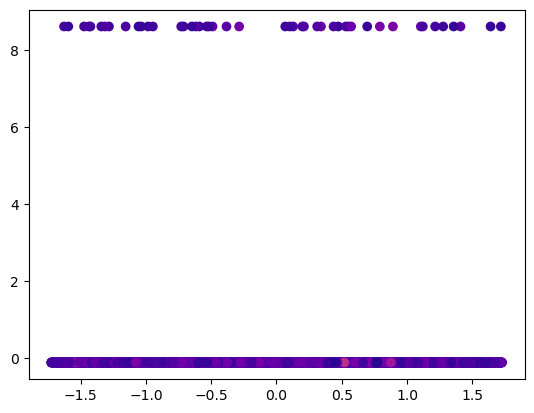

In [173]:
#Plot PCA
plt.scatter(X_train_pca1[:,0],X_train_pca1[:,1],c=y_train,cmap='plasma')

In [59]:
model.save_model('my_xgboost_model.model')

In [144]:
model1.save_model('my_xgboost_model_pca1.model')

In [135]:
X_test_data_pca1=pca_1.fit_transform(test_data_scaled)
X_test_data_pca1.shape

(4209, 10)

In [182]:
y_pred_testpca=model1.predict(test_data_scaled)
y_pred_testpca=y_pred_testpca.reshape(-1,1)
y_pred_testpca=y_scale.inverse_transform(y_pred_testpca)
y_pred_testpca

array([[ 81.92636 ],
       [100.98151 ],
       [ 82.276   ],
       ...,
       [ 93.392975],
       [110.42084 ],
       [ 92.93552 ]], dtype=float32)

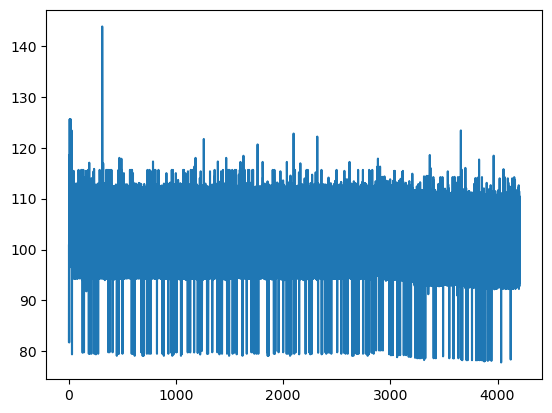

In [183]:

plt.plot(y_pred_testpca)

In [188]:
#T-SNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(train_data_scaled)
print(tsne.kl_divergence_)

0.65751051902771


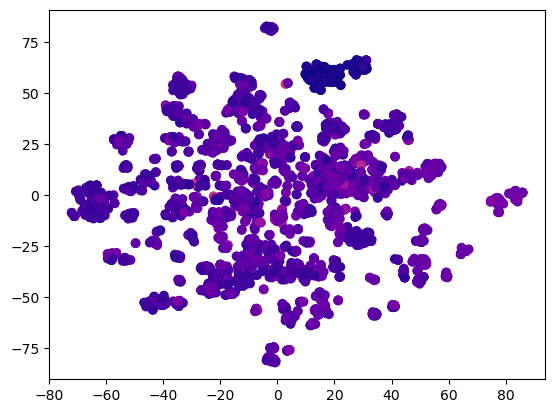

In [191]:
#Plot T-SNE
plt.scatter(X_tsne[:,0],X_tsne[:,1],c=y_scaled,cmap='plasma')
plt.show()

In [197]:
X_train_tsne,X_test_tsne,y_train,y_test=train_test_split(X_tsne,y_scaled,test_size=0.2,random_state=30)

In [198]:
model_tsne=XGBRegressor(objective='reg:squarederror',n_estimators=50,learning_rate=0.1,max_depth=3,random_state=42)
model_tsne.fit(X_train_tsne,y_train)
y_pred_tsne=model_tsne.predict(X_test_tsne)

In [199]:
mse_tsne = mean_squared_error(y_test, y_pred_tsne)
print(f'Mean Squared Error: {mse_tsne}') 

Mean Squared Error: 0.6461178983590298


In [200]:
y_pred_testtsne=model1.predict(test_data_scaled)
y_pred_testtsne=y_pred_testtsne.reshape(-1,1)
y_pred_testtsne=y_scale.inverse_transform(y_pred_testtsne)
y_pred_testtsne

array([[ 81.92636 ],
       [100.98151 ],
       [ 82.276   ],
       ...,
       [ 93.392975],
       [110.42084 ],
       [ 92.93552 ]], dtype=float32)